# Credit Card Dataset for Clustering

Group 7 :

1. Ainal Fajri Malahayati (PYTN-KS12-006)
2. Raihan Daffa Aziz (PYTN-KS12-025)
3. Tsaabitah Anggraini (PYTN-KS12-023)

# 1. About Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

1. CUST_ID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases (
3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment
7. CASH_ADVANCE : Cash in advance given by the user
8. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13. PURCHASES_TRX : Numbe of purchase transactions made
14. CREDIT_LIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user
17. PRCFULLPAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user

# 2. Import Library

In [200]:
# Libraries for clustering and evaluation
! pip install yellowbrick


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as metrics
import statistics
import plotly.graph_objs as go
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy import stats
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# 3. Load Data

In [202]:
data = pd.read_csv("dataset\\archive\\CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [203]:
data.shape

(8950, 18)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [205]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# 4. Data Cleaning

# a. Null-values

In [206]:
data.isnull().sum().any()

True

In [207]:
data.isnull().sum()/len(data)*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

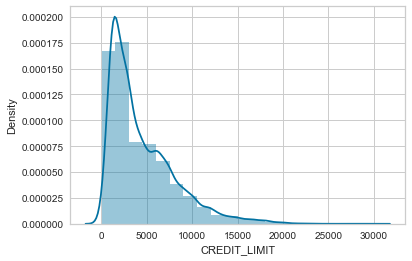

In [208]:
# melihat distribusi data yang terdapat nilai null

CreditLimit = sns.distplot(data['CREDIT_LIMIT'], bins=20, kde=True)
CreditLimit

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

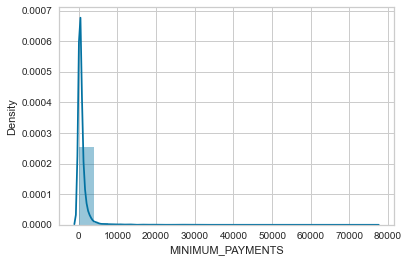

In [209]:
MinPayments = sns.distplot(data['MINIMUM_PAYMENTS'], bins=20, kde=True)
MinPayments

In [210]:
# data direplace dengan nilai median dikarenakan kolom yang terdapat nilai null memiliki distribusi right-skewed
data.fillna(data.median(), inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19356\1469684547.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [211]:
data.isnull().sum().any()

False

# b. Duplicate values

In [212]:
data.duplicated().sum().any()

False

# c. Outlier

In [213]:
# Identify number of columns by type
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in data.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(data[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 17
Discrete features Count 1
Continuous features Count 16
Categorical features Count 1
Binary Categorical features Count 0


In [214]:
print(numerical_features)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [215]:
print(discrete_features)

['TENURE']


In [216]:
print(continuous_features)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [217]:
print(categorical_features)

['CUST_ID']


In [218]:
# Outliers
outliers_features = [feature for feature in continuous_features]
print(outliers_features)
print(len(outliers_features))

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
16


In [219]:
# plot outliers
def plot_boxplot(data, outliers_features):
    # create copy of dataframe
    data = data[continuous_features].copy()
    # Create subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,40))
    fig.subplots_adjust(hspace=0.7)
    
    # set fontdict
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    
    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Fu

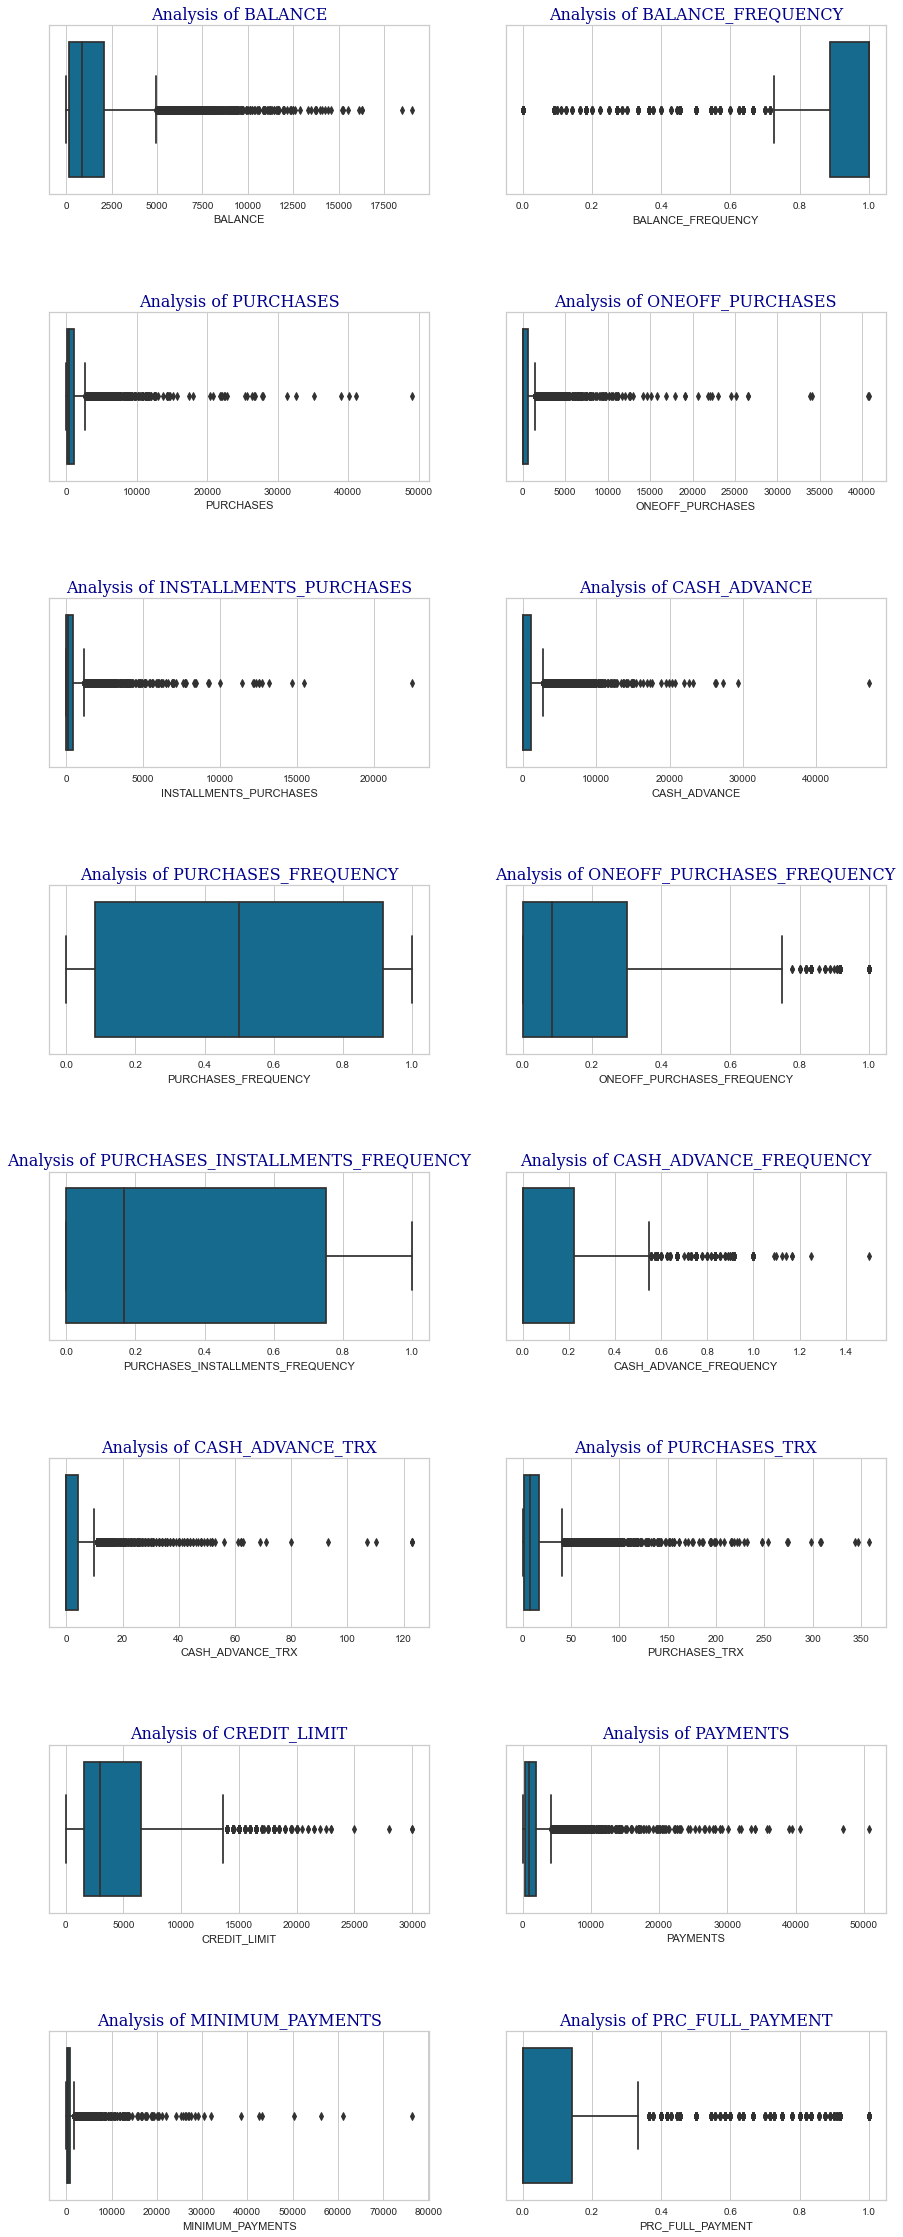

In [220]:
plot_boxplot(data, outliers_features)

In [221]:
# Remove outliers
def remove_outliers(data,outliers_features):
    data = data.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

In [222]:
data = remove_outliers(data,outliers_features)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Fu

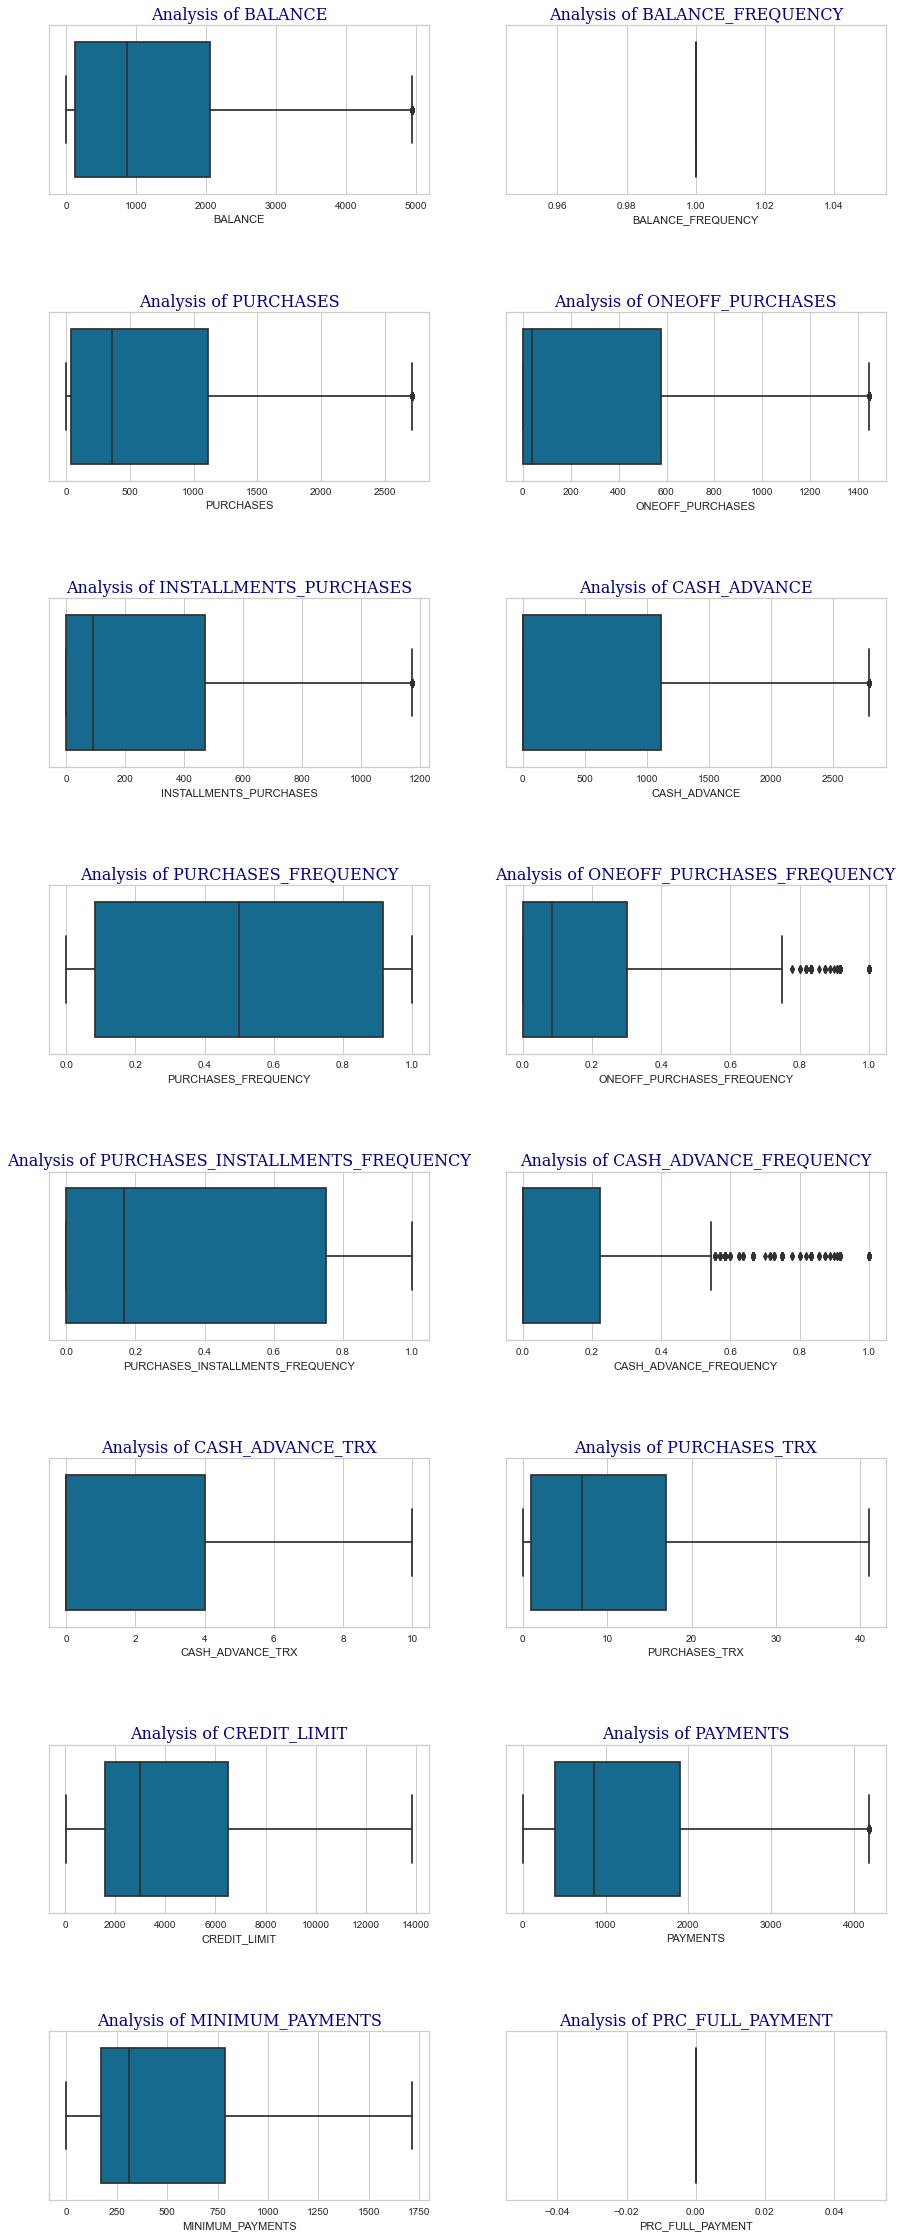

In [223]:
plot_boxplot(data, outliers_features)

# 4. Data Exploration

# a. Query

In [224]:
data['PAYMENTS'].median()

856.901546

In [225]:
data['PAYMENTS'].min()

0.0

In [226]:
data['PAYMENTS'].max()

4178.0

In [227]:
# menghitung jumlah user yang sering melakukan pembayaran kartu kredit dan dalam jangka waktu yang panjang
data1 = data[['PAYMENTS', 'TENURE']]
Query1 = data1[(data1['PAYMENTS'] >= data1['PAYMENTS'].median())]
Query1


,PAYMENTS,TENURE
1,4103.032597,12
5,1400.057770,12
6,4178.000000,12
9,1164.770591,12
10,1083.301007,12
...,...,...
8911,1154.520085,7
8912,929.415656,7
8914,4178.000000,6
8938,1397.770131,6


In [228]:
data2 = data[['PURCHASES','PURCHASES_FREQUENCY']]
Query2 = data2[(data2['PURCHASES_FREQUENCY'] >= data2['PURCHASES_FREQUENCY'].median())]
Query2

,PURCHASES,PURCHASES_FREQUENCY
2,773.17,1.000000
5,1333.28,0.666667
6,2716.00,1.000000
7,436.20,1.000000
10,920.12,1.000000
...,...,...
8942,113.28,1.000000
8945,291.12,1.000000
8946,300.00,1.000000
8947,144.40,0.833333


In [229]:
data3 = data[['TENURE']]
Query3 = data3[(data3['TENURE'] > 6)]
Query3

,TENURE
0,12
1,12
2,12
3,12
4,12
...,...
8908,7
8909,7
8910,7
8911,7


# b. Central Tendency

In [230]:
# 1. Mencari mean
# Menemukan rata-rata dari atribut CASH_ADVANCE_FREQUENCY
mean = data['CASH_ADVANCE_FREQUENCY'].mean()
print(mean)

# 2. Mencari mode
# Menemukan modus untuk dari atribut TENURE
mode = data['TENURE'].mode()
print(mode)

# 3. Mencari median untuk atribut PURCHASES_FREQUENCY
median = statistics.median(data['PURCHASES_FREQUENCY'])
print(median)

0.13497189865921952
0    12
Name: TENURE, dtype: int64
0.5


# c. Variability

In [231]:
# 1. Variance
var = np.var(data['PURCHASES_FREQUENCY'], ddof=1)
print("Variance of PURCHASES_FREQUENCY: ", var)
# 2. Standard Deviation
std = np.std(data['PURCHASES_FREQUENCY'], ddof=1)
print("Standard Deviation of PURCHASES_FREQUENCY: ", std)
# 3. Skewness
z = data['PURCHASES_FREQUENCY']
z.skew()
print("Skewness: ", z.skew())
# 4. Percentiles
percentile = np.percentile(z, [25, 50, 75])
print("Percentile: ", percentile)
# 5. Ranges
range_ = np.ptp(z)
print("Range: ", range)

Variance of PURCHASES_FREQUENCY:  0.1610984768435928
Standard Deviation of PURCHASES_FREQUENCY:  0.40137074736905376
Skewness:  0.06016423585803591
Percentile:  [0.083333 0.5      0.916667]
Range:  1.0


# 5. Data Visualization

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



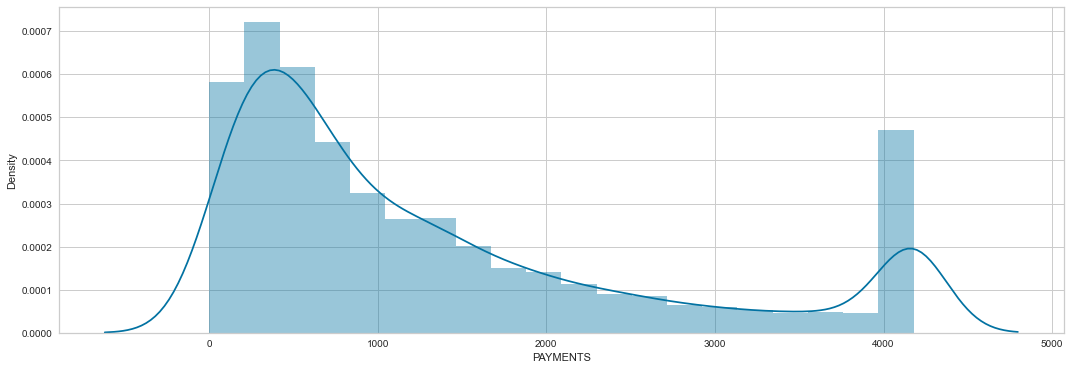

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



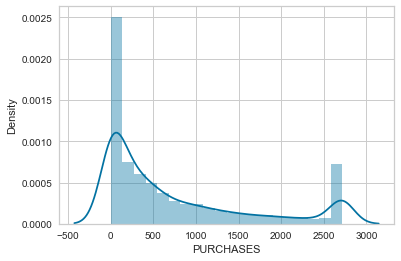

In [232]:
plt.figure(figsize=(18,6))
sorted_creditcard_data1 = data.sort_values(by='PAYMENTS', ascending=True)
sorted_creditcard_data2 = data.sort_values(by='PURCHASES', ascending=True)

# plot of 2 variables
p1=sns.distplot(sorted_creditcard_data['PAYMENTS'], bins=20, kde=True)
plt.show(p1)
p2=sns.distplot(sorted_creditcard_data2['PURCHASES'], bins=20, kde=True)
plt.show(p2)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



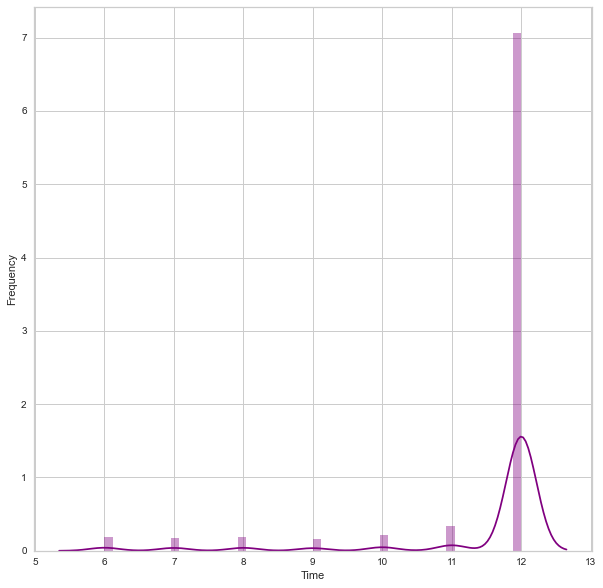

In [233]:
# 3. Depict the distribution of TENURE
plt.figure(figsize=(10,10))
plot = sns.distplot(a=data["TENURE"], kde=True, color='purple')
plot.set(xlabel ='Time', ylabel ='Frequency')
plt.show()

# 6. Data Preprocessing

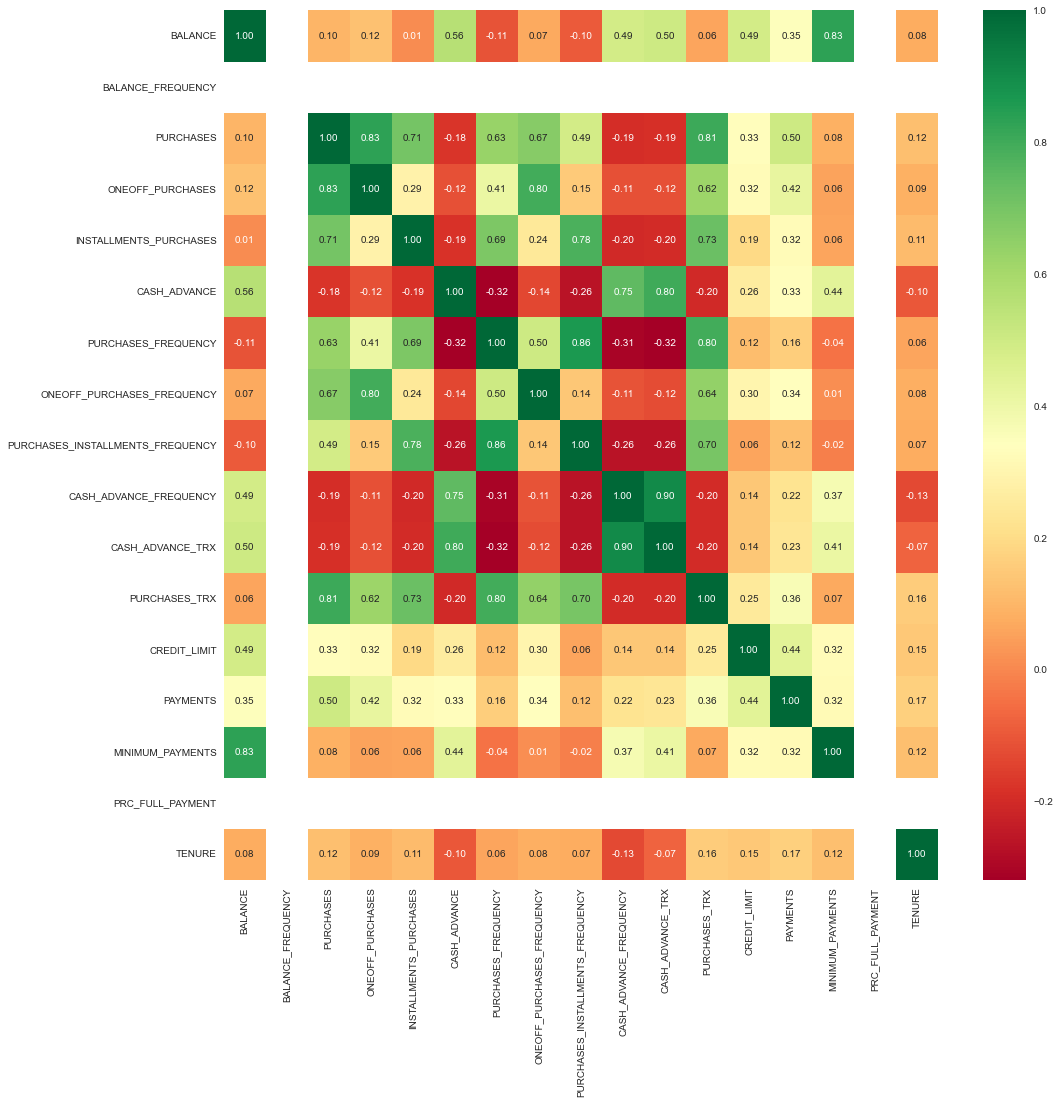

In [234]:
# Heatmap

data_corr = data.corr()
f, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()

In [235]:
# Deleting the columns

data.drop( columns = ['BALANCE_FREQUENCY'],inplace=True)
data.drop( columns = ['PRC_FULL_PAYMENT'],inplace=True)
data.drop(columns=['CUST_ID'], inplace=True)

# 7. Data Modelling

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of

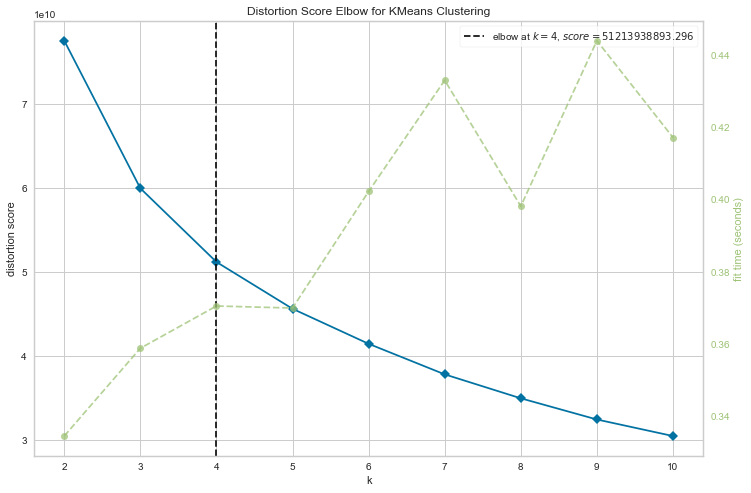

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [236]:
# KElbowVisualizar

plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(data)
elbow_graph.show()

In [237]:
# 4 clusters

grouper = KMeans(n_clusters = 4)

In [238]:
# Group into 4 groups and create a variable with the labels.

grouper.fit(data)
labels = grouper.labels_
print(labels)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 1 2 ... 0 0 0]


In [239]:
# Creating a chart (go = graphic object) with data from labels in two dimensions ('CREDIT_LIMIT' and 'BALANCE')

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['CREDIT_LIMIT'], y = data['BALANCE'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = grouper.labels_.astype(np.float)),
                                                        text = labels))
fig.update_layout(title = 'BALANCE X CREDIT_LIMIT')
fig.update_xaxes(title = 'CREDIT_LIMIT')
fig.update_yaxes(title = 'BALANCE')
fig.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19356\498092334.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [240]:
# Creating a 3D chart

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=data['CREDIT_LIMIT'],
                         y = data['MINIMUM_PAYMENTS'], z = data['BALANCE'],
                         mode = 'markers',                      
                          marker = dict(color = grouper.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19356\576265759.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [241]:
# # Create a range
# range_n_clusters = [i for i in range(2,10)]
# print(range_n_clusters)

In [242]:
# # Importing KMeans and applying silhouette
# values_silhouette = []
# for k in range_n_clusters:
#     grouper = KMeans(n_clusters=k)
#     labels = grouper.fit_predict(data)
#     mean_silhouette = silhouette_score(data, labels)
#     values_silhouette.append(mean_silhouette)

In [243]:
grouper_kmeans = KMeans(n_clusters = 4)
labels_kmeans = grouper_kmeans.fit_predict(data)
print("Labels K-means: ", labels_kmeans)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Labels K-means:  [1 3 2 ... 1 1 1]


In [244]:
# Silhouette Coefficient K-mean

print("The Silhouette Coefficient K-mean is:", silhouette_score(data, labels_kmeans))

The Silhouette Coefficient K-mean is: 0.39391336925695125


Silhouette Coefficient adalah metrik evaluasi yang digunakan untuk mengukur kualitas clustering pada algoritma K-means. Metrik ini menggabungkan ukuran kedekatan antara titik data dengan cluster tempatnya berada (cohesion) dan jarak antara titik data dengan cluster lain yang berdekatan (separation). 

Silhouette Coefficient berkisar antara -1 hingga 1, dengan nilai yang lebih tinggi menunjukkan pengelompokan yang lebih baik:

- Nilai dekat dengan 1 menunjukkan bahwa titik data terletak dengan baik dalam clusternya, dan jarak antara cluster lainnya cukup jauh.
- Nilai mendekati 0 menunjukkan adanya tumpang tindih antara cluster, atau titik data terletak dekat dengan batas antara dua cluster yang berdekatan.
- Nilai mendekati -1 menunjukkan bahwa titik data mungkin ditempatkan dengan lebih baik dalam cluster lain daripada cluster tempatnya berada saat ini.

Nilai Silhouette Coefficient yang lebih tinggi menunjukkan bahwa pengelompokan yang dihasilkan oleh K-means lebih baik. Namun, perlu diingat bahwa Silhouette Coefficient hanya memberikan evaluasi internal terhadap pengelompokan dan tidak mempertimbangkan informasi eksternal seperti label kelas yang sebenarnya. Oleh karena itu, penting untuk digunakan bersama dengan metrik lain dan pertimbangan domain untuk memilih jumlah cluster (k) yang optimal dalam algoritma K-means.

In [245]:
data["cluster"] = labels_kmeans
data.groupby("cluster").describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0         918.0  3055.599958  1975.973747    0.488050   795.921563   
1        5149.0   775.110215   772.600302    0.000000    71.480312   
2        1681.0   671.156639   758.187820    0.000000    83.279708   
3        1202.0  3761.071820  1086.284766  779.577168  2933.434993   

                                               PURCHASES               ...  \
                 50%          75%          max     count         mean  ...   
cluster                                                                ...   
0        3686.761661  4943.000000  4943.000000     918.0  1361.035610  ...   
1         557.277303  1254.480637  3572.844689    5149.0   479.539565  ...   
2         331.686553  1082.330270  3145.204423    1681.0  1243.784438  ...   
3        3893.296949  4943.000000  4943.000000    1202.0   655.747063  ...   

        MINIMUM_PAYMENTS          TENURE                                  \
                     75%     max   count       mean       std  min   25%   
cluster                                                                    
0            1715.000000  1715.0   918.0  11.761438  0.948370  6.0  12.0   
1             501.485565  1715.0  5149.0  11.355215  1.535219  6.0  12.0   
2             314.038049  1715.0  1681.0  11.834027  0.729764  6.0  12.0   
3            1715.000000  1715.0  1202.0  11.582363  1.228426  6.0  12.0   

                           
          50%   75%   max  
cluster                    
0        12.0  12.0  12.0  
1        12.0  12.0  12.0  
2        12.0  12.0  12.0  
3        12.0  12.0  12.0  

[4 rows x 120 columns]

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

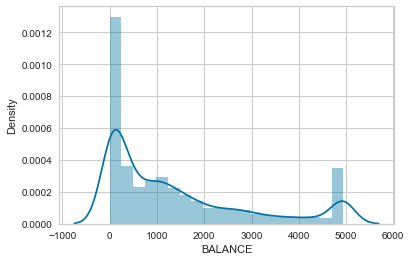

In [249]:
BALANCE = sns.distplot(data['BALANCE'], bins=20, kde=True)
BALANCE

In [246]:
# Statistical analysis of the 'BALANCE' attribute

data.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,918.0,3055.599958,1975.973747,0.488050,795.921563,3686.761661,4943.000000,4943.000000
1,5149.0,775.110215,772.600302,0.000000,71.480312,557.277303,1254.480637,3572.844689
2,1681.0,671.156639,758.187820,0.000000,83.279708,331.686553,1082.330270,3145.204423
3,1202.0,3761.071820,1086.284766,779.577168,2933.434993,3893.296949,4943.000000,4943.000000


In [247]:
# Analysis of the selected attributes using only the average.
# Also including the n_clients column.

description = data.groupby("cluster")["BALANCE", "PURCHASES", "ONEOFF_PURCHASES",
                                    "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
                                    "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY",
                                    "PURCHASES_INSTALLMENTS_FREQUENCY",
                                    "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX",
                                    "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS",
                                    "MINIMUM_PAYMENTS", "TENURE"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
cluster                                                                       
0        3055.599958  1361.035610        709.781776              460.462113   
1         775.110215   479.539565        212.525758              228.760866   
2         671.156639  1243.784438        614.576841              448.760482   
3        3761.071820   655.747063        326.972304              241.705940   

         CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
cluster                                                                  
0         1151.399412             0.597976                    0.383301   
1          448.822626             0.446751                    0.127253   
2          198.567942             0.655789                    0.357104   
3         1927.863868             0.363554                    0.170225   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
cluster    

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19356\680803172.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [248]:
# Analysis 'PURCHASES' and 'PAYMENTS' attributes using the average.
# Also including the n_clients column.

description = data.groupby("cluster")["PURCHASES", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

           PURCHASES     PAYMENTS  n_clients
cluster                                     
0        1361.035610  2595.050802        918
1         479.539565   868.202718       5149
2        1243.784438  1606.811480       1681
3         655.747063  2082.183147       1202


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19356\2171604500.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# 8. Kesimpulan

Analysis
Analyzing only 2 attributes, we can verify the following:
1. The cluster with the highest number of customers has the lowest Payments and Purchases.
2. The cluster with the lowest number of customers has the highest Payments and Purchases.
3. Many other analyzes can be done using all the attributes.
4. After analyzing the attributes, we can make a marketing plan directed to each cluster.